In [1]:
!pip install pyrubberband

  Using cached pyrubberband-0.3.0.tar.gz (4.1 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.



  Using cached PySoundFile-0.9.0.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (671 kB)
  Created wheel for pyrubberband: filename=pyrubberband-0.3.0-py3-none-any.whl size=4265 sha256=0b7225134563bf3876441df316188e633e59731e81a7710872d517e6b17ea608
  Stored in directory: c:\users\youss\appdata\local\pip\cache\wheels\d7\e4\01\8590e5b5fb52cead6f5cc389449054af4423310e45ec34d74e
Successfully built pyrubberband


In [159]:
import scipy
import librosa
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import pyrubberband.pyrb as pyrb

In [160]:
def audio_augmantation(signal,sample_rate):
    pitch_shifted= pyrb.pitch_shift(signal,sr=sample_rate,n_steps=np.random.uniform(low=-5,high=5))
    reversed_audio= signal*-1
    noise= np.random.normal(0,signal.std(),signal.shape[0])
    noisy_signal= signal+noise*np.random.rand()
    return signal,pitch_shifted,reversed_audio,noisy_signal

In [161]:
def sampling_triming(signal, sample_rate,new_rate):
    signal,slicer =librosa.effects.trim(signal,top_db=55)
    sampled_signal=scipy.signal.resample(signal[slicer[0]:slicer[1]],int((new_rate/sample_rate)*signal.shape[0]))
    return sampled_signal, new_rate

In [162]:
def mfcc(signal, sample_rate):
    S = librosa.feature.melspectrogram(signal, sr=sample_rate, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S,n_mfcc=13)
#     delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    log_S=log_S.reshape(-1)
    return log_S

In [167]:
path= "DSP Task 3"
X= np.zeros(4224)
Words=np.array([])
Members=np.array([])
for team in os.listdir(path):
    for words in os.listdir(os.path.join(path,team)):
        if words=="Close the door":
            continue
        for members in os.listdir(os.path.join(path,team,words)):
            counter=0
            for audio in os.listdir(os.path.join(path,team,words,members)):
                counter+=1
                try:
                    signal, sample_rate=librosa.load(os.path.join(path,team,words,members,audio))
                except:
                    continue
                signals=audio_augmantation(signal,sample_rate)
                for i in signals:
                    sampled_signal, new_rate=sampling_triming(i,sample_rate,8000)
                    sampled_signal= librosa.util.fix_length(sampled_signal, int(2.1*new_rate))
                    delta=mfcc(sampled_signal,new_rate)
                    X=np.vstack((X,delta))
                    Words=np.append(Words,words )
                    Members=np.append(Members,members )
                    if words=="Open the door":
                        if counter>=5:
                            break

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: FutureWarning: Pass size=16800 as keyword args. From version 0.10 passing these as positional arguments will result in an error
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-2.4192347e-03  6.2270195e-04 -4.8317565e-04 ...  1.1037410e-05
  2.9180828e-04  1.8393602e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-1.06517348e-03  1.86521705e-04 -2.02674207e-04 ...  8.71873531e-05
 -1.66066158e-04  1.02768899e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[ 2.4192347e-03 -6.2270195e-04  4.8317565e-04 ... -1.1037410e

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.00014699 -0.00065936 -0.00039909 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.0002247  -0.00070184 -0.00042306 ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[0.00014699 0.00065936 0.00039909 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.00440347  0.00508563  0.00495594 ...  0.          

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[ 0.00030031 -0.0001722   0.00018149 ... -0.00013066  0.00084679
  0.00092971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-1.37187172e-04  6.54289854e-05 -1.15307599e-04 ... -1.79573040e-04
 -4.57423769e-04 -1.48930127e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.00030031  0.0001722  -0.00018149 ...  0.00013066 -0.00084679
 -0.00092971] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[ 0.024

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.00257328 -0.00106658  0.0025126  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[0.00338002 0.00612419 0.00750168 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[ 0.00257328  0.00106658 -0.0025126  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[ 0.00455768 -0.0056181  -0.02562166 ...  0.          

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-5.67000147e-05 -4.58989846e-04  1.84396745e-04 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[ 3.3553297e-04  1.8229381e-05 -1.2205103e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[-0.00011005 -0.00027179 -0.0003402  ...  0.          0.
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass

ValueError: invalid number of data points (0) specified

In [164]:
X.shape

(151, 4224)

In [165]:
Data=pd.DataFrame(X).drop(0)
Data["Words"]=Words
Data["Members"]=Members

In [166]:
Data[Data["Words"]=="Wrong"]

0          1          2          3          4          5  \
143 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
144 -78.108431 -78.438142 -78.951289 -78.319110 -79.159029 -78.364304   
145 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
146 -42.997363 -39.944747 -45.160370 -49.454536 -43.660990 -37.595904   
147 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
148 -77.297390 -77.551071 -78.428040 -78.337485 -78.578054 -78.071453   
149 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000   
150 -44.514549 -41.788420 -43.094400 -44.573849 -44.828131 -45.269137   

             6          7          8          9  ...       4216       4217  \
143 -78.264191 -60.683475 -57.539474 -63.603466  ... -66.551964 -68.976822   
144 -78.856428 -70.519007 -57.799074 -57.932130  ... -79.668404 -80.000000   
145 -78.264191 -60.683475 -57.539474 -63.603466  ... -66.551964 -68.976822   
146 -39.610496 -43.891171 -45.757335 -44.822639  ... -42.097841 -42.638156   
147 -80.000000 -80.000000 -80.000000 -80.000000  ... -41.387291 -47.124847   
148 -78.059482 -78.575251 -79.159234 -79.647251  ... -39.912310 -49.795948   
149 -80.000000 -80.000000 -80.000000 -80.000000  ... -41.387291 -47.124847   
150 -48.186777 -49.127749 -47.762887 -43.793901  ... -40.466276 -44.316736   

          4218       4219       4220       4221       4222       4223  Words  \
143 -75.976532 -79.031769 -80.000000 -80.000000 -80.000000 -80.000000  Wrong   
144 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000 -80.000000  Wrong   
145 -75.976532 -79.031769 -80.000000 -80.000000 -80.000000 -80.000000  Wrong   
146 -43.754606 -46.428235 -45.677203 -45.454515 -45.235027 -45.850846  Wrong   
147 -53.504143 -64.307930 -65.995667 -69.358490 -70.945732 -69.265884  Wrong   
148 -64.221461 -77.190589 -79.687419 -80.000000 -80.000000 -80.000000  Wrong   
149 -53.504143 -64.307930 -65.995667 -69.358490 -70.945732 -69.265884  Wrong   
150 -44.308555 -45.101440 -43.989778 -44.261262 -43.472112 -43.640502  Wrong   

         Members  
143  Dina Hussam  
144  Dina Hussam  
145  Dina Hussam  
146  Dina Hussam  
147  Dina Hussam  
148  Dina Hussam  
149  Dina Hussam  
150  Dina Hussam  

[8 rows x 4226 columns]

In [238]:
durations=[]
for team in os.listdir(path):
    for words in os.listdir(os.path.join(path,team)):
        max_audio=5
        if words=="wrong":
            continue
        for members in os.listdir(os.path.join(path,team,words)):
            counter=0
            for audio in os.listdir(os.path.join(path,team,words,members)):
                counter+=1
                try:
                    durations.append(librosa.get_duration(filename=os.path.join(path,team,words,members,audio)))
                except:
                    pass
#                 if counter>=5:
#                     break

In [215]:
np.mean(durations)

1.7923273396164023

In [407]:
Data["Members"][Data["Members"].str.contains("|".join(["Romaisaa","Dina Hussam","Shaban"]))==False]="Others"

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(Data.drop(["Words","Members"],axis=1))

In [146]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(reduced_X,Data["Words"],test_size=0.2,stratify=Data["Words"])
X_train.shape , X_test.shape,y_train.shape,y_test.shape

((362, 190), (91, 190), (362,), (91,))

In [151]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(n_estimators=150,n_jobs=-1,max_depth=5)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
np.mean(y_pred==y_test)

0.8571428571428571

In [152]:
from sklearn.metrics import f1_score
f1_score(y_true=y_test=="Open the door",y_pred=new_y_pred,average="weighted")

0.9238437574886174

In [153]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=y_test,y_pred=y_pred)

array([[56,  0],
       [13, 22]], dtype=int64)

In [155]:
new_y_pred=clf.predict_proba(X_test)[:,0]>=0.6
confusion_matrix(y_true=y_test=="Open the door",y_pred=new_y_pred)

array([[29,  6],
       [ 8, 48]], dtype=int64)

In [156]:
y_pred_train=clf.predict(X_train)
f1_score(y_true=y_train,y_pred=y_pred_train,average="weighted")

0.9944678498545901

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
reduced_X=pca.fit_transform(X)


In [97]:
reduced_X.shape

(453, 190)

In [157]:
test_signal, sampling_rate= librosa.load(r"C:\Users\youss\Desktop\Wrong\Audio3.wav")
sampled_signal, new_rate=sampling_triming(i,sample_rate,8000)
sampled_signal= librosa.util.fix_length(sampled_signal, int(2.1*new_rate))
delta=mfcc(sampled_signal,new_rate)

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: Pass size=16800 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: Pass y=[0.00017516 0.00014067 0.00103448 ... 0.         0.         0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


In [158]:
test_delta=scaler.transform([delta])
delta_reduced=pca.transform(test_delta)
clf.predict(delta_reduced)

array(['Open the door'], dtype=object)

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00065898 -0.00027732
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


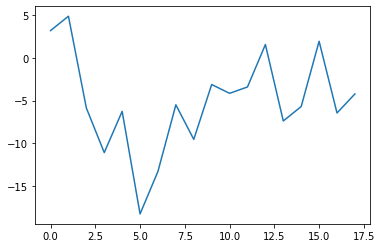

In [21]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
audio,sr = librosa.load(r"D:\Projects\Voice-Passsword-Checker\audio.wav")
mfcc= librosa.feature.mfcc(audio, sr)
means=np.mean(mfcc,axis=1)
plt.plot(means[2:])

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: Pass y=[ 9.3271134e-05  1.2277882e-04  2.6065154e-05 ...  1.2815610e-04
 -7.7002587e-06  8.2933278e-05], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: Pass y=[ 9.3271134e-05  1.2277882e-04  2.6065154e-05 ...  1.2815610e-04
 -7.7002587e-06  8.2933278e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys


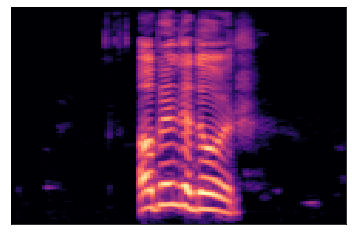

In [25]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
import librosa.display
audio,sr = librosa.load(r"D:\Projects\Voice-Passsword-Checker\Team-voices\Dina.wav")
mfcc= librosa.feature.mfcc(audio, sr)
mel=librosa.feature.melspectrogram(audio, sr=sr)
mel=librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel)

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00112756 0.00038837 0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: Pass y=[0.         0.         0.         ... 0.00112756 0.00038837 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


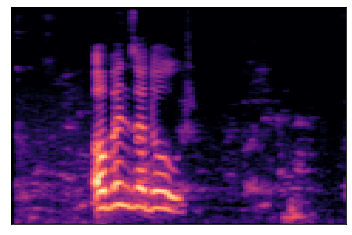

In [26]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
audio,sr = librosa.load(r"D:\Projects\Voice-Passsword-Checker\Team-voices\Romaisaa.wav")
mfcc= librosa.feature.mfcc(audio, sr)
mel=librosa.feature.melspectrogram(audio, sr=sr)
mel=librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel)

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00055291 -0.00049569
  0.        ], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """
C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00055291 -0.00049569
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  


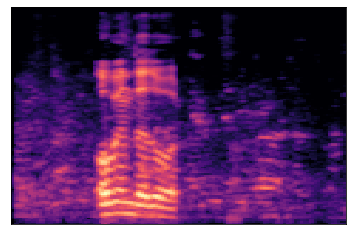

In [27]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
audio,sr = librosa.load(r"D:\Projects\Voice-Passsword-Checker\Team-voices\Shaaban.wav")
mfcc= librosa.feature.mfcc(audio, sr)
mel=librosa.feature.melspectrogram(audio, sr=sr)
mel=librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel)
